# Collect Data

In this notebook we collect the country-specific death counts into 2 files.

In [ ]:
# default_exp collect

In [ ]:
#export
from weekly_mort.imports import *
from weekly_mort.core import *

## Create Overall Dataset

In [ ]:
#export
COUNTRIES = [x.parts[-1] for x in PROCESSED_DIR_BASE.iterdir()]

COUNTRIES

['Netherlands', 'United Kingdom']

In [ ]:
#export
_neccessary_cols = ['Week', 'Year', 'Deaths']
_extra_cols = ['Age', 'Sex', 'Region', 'Condition']

_dfs = [pd.read_csv(PROCESSED_DIR_BASE/c/'deaths.csv') for c in COUNTRIES]

for country, df in zip(COUNTRIES, _dfs):
    
    # No other column than the ones listed above
    assert all([x in _neccessary_cols+_extra_cols for x in df.columns])
    
    # We have all necessary columns
    assert all(x in df.columns for x in _neccessary_cols)
    
    # Pad other columns with 'Total' so they match up
    for col in _extra_cols:
        if col not in df.columns:
            df[col] = 'Total'
    
    df['Country'] = country

# Align columns            
_dfs = [df[['Country'] + _neccessary_cols[:2] + _extra_cols + ['Deaths']] for df in _dfs]

In [ ]:
df = pd.concat(_dfs)

df.head()

,Country,Week,Year,Age,Sex,Region,Condition,Deaths
0,Netherlands,0,2017,Total,Total,Total,Total,469
1,Netherlands,1,2017,Total,Total,Total,Total,3568
2,Netherlands,2,2017,Total,Total,Total,Total,3637
3,Netherlands,3,2017,Total,Total,Total,Total,3487
4,Netherlands,4,2017,Total,Total,Total,Total,3626


In [ ]:
df.to_csv(DATASET_DIR/'excess_deaths.csv', index=False)

## Create Table of Subsets

In [ ]:
#export
def _get_unique_vals(country, df, cols = ['Year', 'Age', 'Sex', 'Region', 'Condition']):
    colvals = {'Country': country}
    colvals.update({c:df[c].unique() for c in cols})
    return colvals

SUMMARY = pd.DataFrame([_get_unique_vals(c, d) for c, d in zip(COUNTRIES, _dfs)]).to_html()

## Create Country Total Subset

In [ ]:
totals = df[np.all([df[col] == 'Total' for col in _extra_cols], axis=0)]

In [ ]:
totals = df[np.all([df[col] == 'Total' for col in _extra_cols], axis=0)]
totals = totals[['Country'] + _neccessary_cols]

In [ ]:
totals.head()

,Country,Week,Year,Deaths
0,Netherlands,0,2017,469
1,Netherlands,1,2017,3568
2,Netherlands,2,2017,3637
3,Netherlands,3,2017,3487
4,Netherlands,4,2017,3626


In [ ]:
totals = totals.set_index(['Country', 'Week']).pivot(columns = 'Year').reset_index()

In [ ]:
totals.columns = [str(x) + str(y) for x, y in totals.columns]

In [ ]:
totals.head(3)

,Country,Week,Deaths2017,Deaths2018,Deaths2019,Deaths2020
0,Netherlands,0,469.0,3343.0,2606.0,2242.0
1,Netherlands,1,3568.0,3359.0,3262.0,3364.0
2,Netherlands,2,3637.0,3364.0,3150.0,3151.0


In [ ]:
totals.to_csv(DATASET_DIR / 'total_deaths.csv', index=False)

## Combine Weekdates

In [ ]:
wkds = [pd.read_csv(PROCESSED_DIR_BASE/c/'week_dates.csv') for c in COUNTRIES]

In [ ]:
for c, wkd in zip(COUNTRIES, wkds):
    wkd['Country'] = c

In [ ]:
wkds = pd.concat(wkds)[['Country', 'Year', 'Week', 'Start', 'End']]

wkds.head()

,Country,Year,Week,Start,End
0,Netherlands,2017,0,2017-01-01,2017-01-01
1,Netherlands,2017,1,2017-01-02,2017-01-08
2,Netherlands,2017,2,2017-01-09,2017-01-15
3,Netherlands,2017,3,2017-01-16,2017-01-22
4,Netherlands,2017,4,2017-01-23,2017-01-29


In [ ]:
wkds.to_csv(DATASET_DIR / 'week_dates.csv', index=False)

## Example Chart

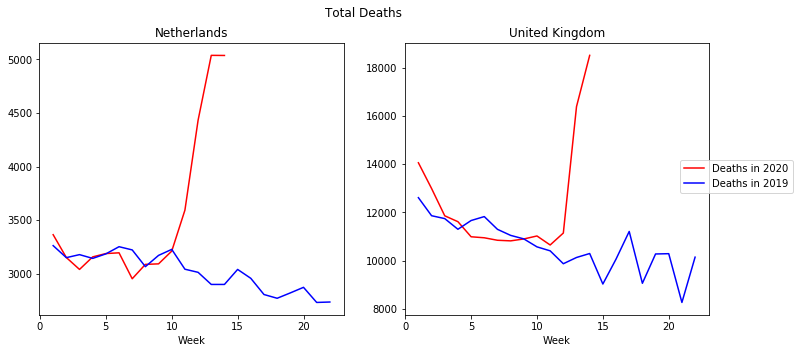

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, (country, dt) in enumerate(totals.groupby('Country')):

    dt = dt[(dt.Week >= 1) & (dt.Week <= 5 + datetime.date.today().isocalendar()[1])]

    ax = axes.flat[i]
    ax.set_title(country)
    ax.plot(dt.Week, dt.Deaths2020, color = 'r', label='Deaths in 2020')
    ax.plot(dt.Week, dt.Deaths2019, color = 'b', label='Deaths in 2019')
    ax.set_xlabel('Week')

handles, labels = axes.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
fig.suptitle('Total Deaths')

fig.savefig(ROOT_DIR / 'total_deaths.png')

## Convert

In [ ]:
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 010_UK.ipynb.
Converted 020_Netherlands.ipynb.
Converted 03_collect.ipynb.
Converted index.ipynb.
